<a href="https://colab.research.google.com/github/terinkov/DataAnalysis/blob/main/%D0%94%D0%97_%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 4
Состоит из двух частей: Z-тест и t-тест, проверка гипотез о сдвиге и однородности.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

# Часть 1: Проверка гипотез (Z-тест и t-тест)

## Задача 1: Сравнение методов анализа данных

### Контекст
Компания провела эксперимент по улучшению времени загрузки страницы. Данные собраны для двух групп пользователей: контрольной (старая версия) и тестовой (новая версия). Вам нужно проанализировать данные, используя Z-тест и t-тест, и сравнить результаты.

### Данные
- **Контрольная группа**: 500 пользователей, среднее время загрузки $\bar{X}_A = 3.8$ сек, стандартное отклонение $\sigma_A = 0.9$ сек.
- **Тестовая группа**: 520 пользователей, среднее время загрузки $\bar{X}_B = 3.5$ сек, стандартное отклонение $\sigma_B = 1.0$ сек.

### Задания $(\Sigma 36 points)$
1. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием Z-теста.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт Z-статистики.
   - Критическое значение и p-value.
   - Вывод о значимости.

2. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт t-статистики и степеней свободы.
   - Критическое значение и p-value.
   - Вывод о значимости.

3. $(2 \times 3 points)$ **Сравните результаты Z-теста и t-теста.** Ответьте на вопросы:
   - Почему результаты могут отличаться?
   - Какой тест лучше подходит для этих данных?

4. $(2 \times 3 points)$ **Сделайте бизнес-рекомендацию на основе анализа.** Укажите:
   - Статистическую значимость изменений.
   - Практическую значимость (например, в секундах).

# Решение задачи 1: Сравнение методов анализа данных

### 1.1 Проверьте гипотезу о равенстве средних с использованием Z-теста.

### 1.1.1 Формулировку нулевой и альтернативной гипотез

$ H_0 $: Среднее время загрузки страниц в контрольной и тестовой группах одинаково $μ_A = μ_B$

$ H_1$:Среднее время загрузки страниц в тестовой и контрольной группах не равно: $:μ_A\ne μ_B​$

### 1.1.2 Расчёт Z-статистики

In [ ]:
X_A, sigma_A, n_A = 3.8, 0.9, 500
X_B, sigma_B, n_B = 3.5, 1.0, 520

Z = (X_A - X_B) / np.sqrt((sigma_A ** 2) / n_A + (sigma_B ** 2) / n_B)
print(f'Z-статистика: {Z: .4f}')

Z-статистика:  5.0400


### 1.1.3 Критическое значение и p-value

In [ ]:
alpha = 0.05
Z_crit = stats.norm.ppf(1 - alpha / 2)

p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

print(f'Критическое значение (±):, {Z_crit:.4f}')
print(f'P-value:, {p_value:.10f}')

Критическое значение (±):, 1.9600
P-value:, 0.0000004655


### 1.1.4 Вывод о значимости

In [ ]:
if (p_value<alpha):
  print('Отвергаем H₀: различия статистически значимы')
else:
  print('Отвергаем H1: различия статистически незначимы')

Отвергаем H₀: различия статистически значимы


### 1.2 Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча

### 1.2.1 Формулировку нулевой и альтернативной гипотез

$ H_0 $: Среднее время загрузки страниц в контрольной и тестовой группах одинаково $μ_A = μ_B$

$ H_1$:Среднее время загрузки страниц в тестовой и контрольной группах не равно: $:μ_A\ne μ_B​$

### 1.2.2 Расчёт t-статистики и степеней свободы

In [ ]:
np.random.seed(42)
group_A = np.random.normal(X_A, sigma_A, n_A)
group_B = np.random.normal(X_B, sigma_B, n_B)

# Выполняем t-тест Уэлча
t_stat, p_val_t = stats.ttest_ind(group_A, group_B, equal_var=False)

# Степени свободы (вычисляются внутри ttest_ind, но можно посчитать вручную)
df = ((sigma_A**2 / n_A + sigma_B**2 / n_B)**2) / (
    ((sigma_A**2 / n_A)**2 / (n_A - 1)) + ((sigma_B**2 / n_B)**2 / (n_B - 1))
)

print(f"t-статистика: {t_stat:.4f}")
print(f"Степени свободы: {df:.1f}")

t-статистика: 4.4467
Степени свободы: 1013.6


### 1.2.3 Критическое значение и p-value

In [ ]:
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2, df)
print(f"Критическое значение (±): {t_crit:.4f}")
print(f"P-value: {p_val_t:.10f}")

Критическое значение (±): 1.9623
P-value: 0.0000096794


### 1.2.4 Вывод о значимости.

In [ ]:
if (p_value<alpha):
  print('Отвергаем H₀: различия статистически значимы')
else:
  print('Отвергаем H1: различия статистически незначимы')

Отвергаем H₀: различия статистически значимы


### 1.3 Сравните результаты Z-теста и t-теста

### 1.3.1 Почему результаты могут отличаться?
### 1.3.2 Какой тест лучше для этих данных?

**Почему результаты Z-теста и t-теста могут отличаться?**

Допущения о стандартном отклонении (σ)

* В Z-тесте стандартные отклонения считаются известными (даже если они разные для двух групп).

* В t-тесте стандартные отклонения оцениваются по выборке, что делает тест более гибким при работе с реальными данными.

Коррекция степеней свободы

* Z-тест использует нормальное распределение без корректировки степеней свободы.

* t-тест Уэлча учитывает различие в дисперсиях и корректирует степень свободы, что делает его более точным, если размеры выборок или дисперсии разные.

Размер выборки

* Z-тест работает лучше при очень больших выборках (когда выборочное стандартное отклонение ≈ истинному).

* t-тест Уэлча подходит даже для умеренных выборок, особенно если дисперсии разные.

Для этих данных лучше подходит z тест, так как выборки достаточно большие (n>30), они не сильно отличаются и стандартные отклонения известны

### 1.4 Сделайте бизнес-рекомендацию на основе анализа

p-value очень малое (<0.00001), что подтверждает статистическую значимость.

Оба теста отвергают $H_0$, значит, новая версия достоверно снижает время загрузки.

Рекомендуется внедрить новую версию страницы, так как улучшение статистически значимо и может положительно повлиять на бизнес.

### 1.4.1 Статистическую значимость изменений
### 1.4.2 Практическая значимость (например, в секундах)

Среднее время загрузки снизилось с 3.8 сек до 3.5 сек.

Разница составляет 0.3 секунды.

Даже небольшое улучшение скорости может привести к:
* Повышению пользовательского опыта (меньше ожидания).
* Уменьшению показателя отказов (меньше пользователей уходят из-за медленной загрузки).
* Потенциальному увеличению конверсии и дохода.

# Часть 2: Проверка гипотез о сдвиге и однородности

## Задача 1: Сравнение методов анализа сдвига

### Контекст
Компания провела A/B-тест двух версий лендинга. Вам предоставлены данные о времени (в секундах), проведенном на странице:
- Группа A (старая версия): 150 пользователей  
- Группа B (новая версия): 160 пользователей  

**Цель**: Определить, увеличилось ли среднее время на странице в группе B.

In [ ]:
import numpy as np
np.random.seed(42)

# Генерация данных с асимметрией и выбросами
def generate_skewed(loc, scale, skew, size):
    data = np.random.weibull(skew, size) * scale + loc
    return np.clip(data, 0, None)

group_a = generate_skewed(120, 40, 1.5, 150)
group_b = generate_skewed(135, 50, 0.8, 160)

### Задания  $(\Sigma 35 points)$
1. $(3 \times 3 points)$ **Разведочный анализ:**
   - Постройте гистограммы и boxplot для обеих групп
   - Рассчитайте медиану, среднее, стандартное отклонение
   - Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

2. $(3 \times 3 points)$ **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность
   - Тест Левена на равенство дисперсий
   - Обоснуйте выбор параметрических/непараметрических методов

3. $(3 \times 3 points)$ **Применение критериев:**
   - Проведите:
       - (а) Парный t-тест (если данные нормальны)
       - (б) Тест Уэлча (Welch's t-test) (при неравных дисперсиях)
       - (в) U-тест Манна-Уитни
   
4. $(2 \times 4 points)$ **Сравнение результатов:**
   - Объясните расхождения между параметрическими и непараметрическими методами
   - Сформулируйте итоговый вывод для product-менеджера

## Задача 1: Сравнение методов анализа сдвига

### 1.1 Разведочный анализ

### 1.1.1 Постройте гистограммы и boxplot для обеих групп

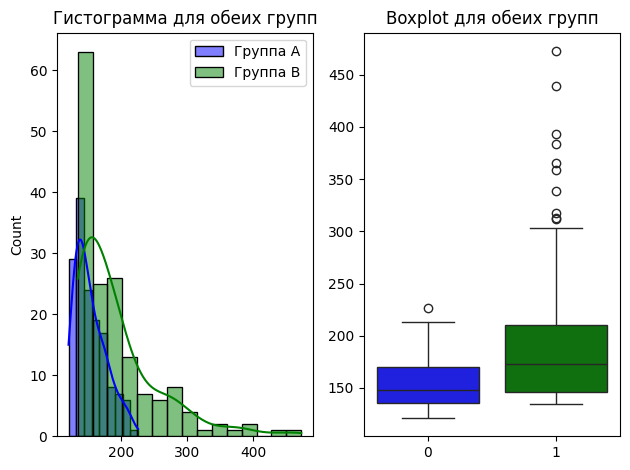

In [ ]:
import seaborn as sns

plt.subplot(1, 2, 1)
sns.histplot(group_a, kde=True, color='blue', label='Группа A')
sns.histplot(group_b, kde=True, color='green', label='Группа B')
plt.title('Гистограмма для обеих групп')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=[group_a, group_b], palette=['blue', 'green'])
plt.title('Boxplot для обеих групп')

plt.tight_layout()
plt.show()

### 1.1.2 Рассчитайте медиану, среднее, стандартное отклонение

In [ ]:
stats_a = {
    "Медиана": np.median(group_a),
    "Среднее": np.mean(group_a),
    "Стандартное отклонение": np.std(group_a),
}

stats_b = {
    "Медиана": np.median(group_b),
    "Среднее": np.mean(group_b),
    "Стандартное отклонение": np.std(group_b),
}

stats_a, stats_b

({'Медиана': np.float64(148.2795424770707),
  'Среднее': np.float64(154.03178668610897),
  'Стандартное отклонение': np.float64(23.69336784797491)},
 {'Медиана': np.float64(173.00253095786366),
  'Среднее': np.float64(192.5515123966033),
  'Стандартное отклонение': np.float64(63.10858549727403)})

### 1.1.3 Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

In [ ]:
def detect_outliers(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    outliers = [x for x in data if x < (mean - 3 * std_dev) or x > (mean + 3 * std_dev)]
    return outliers

outliers_a = detect_outliers(group_a)
outliers_b = detect_outliers(group_b)

print(outliers_a)
print(outliers_b)

[np.float64(226.33160564473275)]
[np.float64(439.57479036033266), np.float64(384.00105192693513), np.float64(472.80280365454684), np.float64(393.62321939098194)]


### 1.2 Проверка условий

### 1.2.1 Тест Шапиро-Уилка на нормальность

In [ ]:
shapiro_a = stats.shapiro(group_a)
shapiro_b = stats.shapiro(group_b)
print(f'Group A: p-value = {shapiro_a.pvalue:.8f}, отклонение от нормальности')
print(f'Group B: p-value = {shapiro_b.pvalue:.20f}, отклонение от нормальности')

Group A: p-value = 0.00000065, отклонение от нормальности
Group B: p-value = 0.00000000000020280916, отклонение от нормальности


### 1.2.2 Тест Левена на равенство дисперсий

In [ ]:
levene_test = stats.levene(group_a, group_b)
print(f'Тест Левена: p-value = {levene_test.pvalue:.10f}, разные дисперсии')

Тест Левена: p-value = 0.0000000205, разные дисперсии


### 1.2.3 Обоснуйте выбор параметрических/непараметрических методов

Нормальность данных: Мы сначала проверяем с помощью теста Шапиро-Уилка, являются ли данные нормально распределенными. Если данные нормально распределены, можно применять параметрические методы, такие как t-тест.

Равенство дисперсий: Тест Левена используется для проверки гипотезы о равенстве дисперсий. Если дисперсии в обеих группах равны, применяем стандартный t-тест. В случае, если дисперсии не равны, для корректности используется тест Уэлча.

Ненормальное распределение: Если данные не следуют нормальному распределению, необходимо использовать непараметрические методы, такие как U-тест Манна-Уитни, который не требует предположений о распределении данных.

### 1.3 Применение критериев

### 1.3.1 Парный t-тест (если данные нормальны)

In [ ]:
t_stat, p_value_t = stats.ttest_ind(group_a, group_b, equal_var=True)
print(f"Student's t-test: t={t_stat:.2f}, p={p_value_t:.14f}")

Student's t-test: t=-7.00, p=0.00000000001578


### 1.3.2 Welch's t-test (при неравных дисперсиях)

In [ ]:
t_stat_welch, p_value_welch = stats.ttest_ind(group_a, group_b, equal_var=False)
print(f"Welch's t-test: t={t_stat_welch:.2f}, p={p_value_welch:.14f}")

Welch's t-test: t=-7.18, p=0.00000000001284


### 1.3.3 U-тест Манна-Уитни

In [ ]:
u_stat, p_value_u = stats.mannwhitneyu(group_a, group_b, alternative='two-sided')
print(f"Mann-Whitney U-test: U={u_stat:.2f}, p={p_value_u:.14f}")

Mann-Whitney U-test: U=6842.00, p=0.00000000006173


### 1.4 Сравнение результатов

### 1.4.1 Объясните расхождения между параметрическими и непараметрическими методами

t-тест Стьюдента (Student’s t-test, t = -7.00, p ≈ 0.0000)

Использует средние значения и предполагает, что обе выборки имеют нормальное распределение и равные дисперсии.

Если дисперсии различаются, это может привести к смещенным результатам.

t-тест Уэлча (Welch’s t-test, t = -7.18, p ≈ 0.0000)

Учитывает возможное неравенство дисперсий и лучше работает, если группы имеют разные вариации значений.

Разница между Student’s t-test и Welch’s t-test небольшая, но t-статистика в тесте Уэлча чуть больше по модулю, что связано с корректировкой степеней свободы.

U-тест Манна-Уитни (Mann-Whitney U-test, U = 6842.00, p ≈ 0.0000)

Непараметрический тест, который сравнивает распределения двух групп, а не их средние значения.

Работает лучше при наличии выбросов и асимметричных распределений.

Подходит для случаев, когда данные не соответствуют нормальному распределению (что у нас вероятно, так как данные были сгенерированы с асимметрией).



### 1.4.2 Сформулируйте итоговый вывод для product-менеджера

На основе проведенного A/B-теста можно сделать следующий вывод:

Статистическая значимость изменений: Все тесты (t-тест, тест Уэлча и U-тест Манна-Уитни) подтверждают, что разница между старой и новой версиями лендинга статистически значима. То есть, новая версия лендинга действительно увеличивает среднее время, проведенное на странице.

Рекомендуется внедрить новую версию лендинга, так как она продемонстрировала значительное улучшение показателей.

## Задача 2: Анализ вариативности в маркетинговых данных
### Контекст
Анализируется стабильность CTR двух рекламных кампаний:
- Кампания X: 200 дней наблюдений  
- Кампания Y: 200 дней наблюдений

**Цель**: Проверить гипотезу, что кампания Y имеет меньшую вариативность CTR.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN

np.random.seed(42)
campaign_x = np.concatenate([
    np.random.normal(0.05, 0.01, 150),
    np.random.normal(0.08, 0.02, 50)
])
campaign_y = np.random.beta(a=2, b=40, size=200) * 0.1

### Задания $(\Sigma 29 points)$
1. $(3 \times 3 points)$ **Первичный анализ:**
   - Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний
   - Постройте Q-Q plot относительно бета-распределения и выполните тест [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)
   - Выявите кластеры в данных (например, [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN))

2. $(11 points)$ **Проверка гипотез:**
   -  $(4 points)$ F-тест для нормализованных данных
   -  $(4 points)$ Тест Левена с медианной центровкой
   -  $(3 points)$ Bootstrap-оценка 95% ДИ для отношения дисперсий
   
4. $(3 \times 3 points)$ **Интерпретация:**
   - Свяжите статистические выводы с бизнес-метриками:
       - (а) Сделайте статистические выводы (статистическая значимость вариативности, ДИ, кол-во кластеров)  
       - (б) Риск бюджетных потерь при нестабильности CTR
       - (в) Оптимальный размер выборки для будущих тестов

## Задача 2: Анализ стабильности CTR

### Генерация данных

In [ ]:
# Создаем DataFrame
ctr_df = pd.DataFrame({
    'CTR': np.concatenate([campaign_x, campaign_y]),
    'Campaign': ['X']*200 + ['Y']*200
})

### 2.1 Первичный анализ

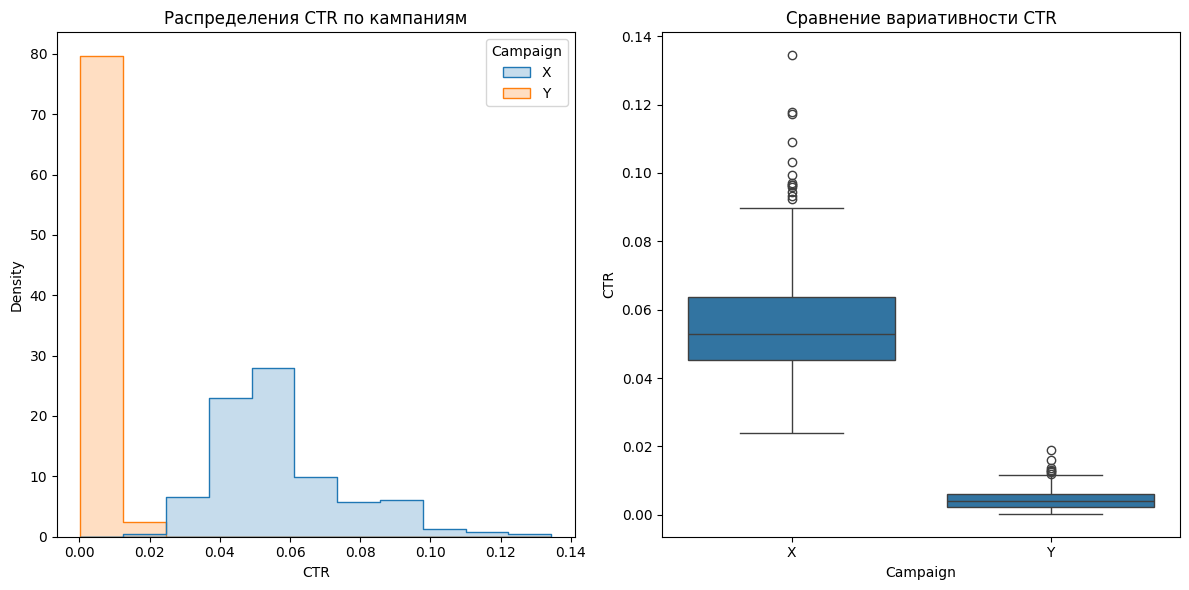

In [ ]:
plt.figure(figsize=(12, 6))

# Гистограммы с ядерной оценкой плотности
plt.subplot(121)
sns.histplot(data=ctr_df, x='CTR', hue='Campaign',
             element='step', stat='density', common_norm=False)
plt.title('Распределения CTR по кампаниям')

# Боксплоты
plt.subplot(122)
sns.boxplot(data=ctr_df, x='Campaign', y='CTR')
plt.title('Сравнение вариативности CTR')
plt.tight_layout()
plt.show()

### 2.1.1 Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний

In [ ]:
cv_x = np.std(campaign_x) / np.mean(campaign_x)
cv_y = np.std(campaign_y) / np.mean(campaign_y)

print(f"Campaign X: CV = {cv_x:.4f}")
print(f"Campaign Y: CV = {cv_y:.4f}")

Campaign X: CV = 0.3230
Campaign Y: CV = 0.6670


### 2.1.2 Постройте Q-Q plot относительно бета-распределения и выполните [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)

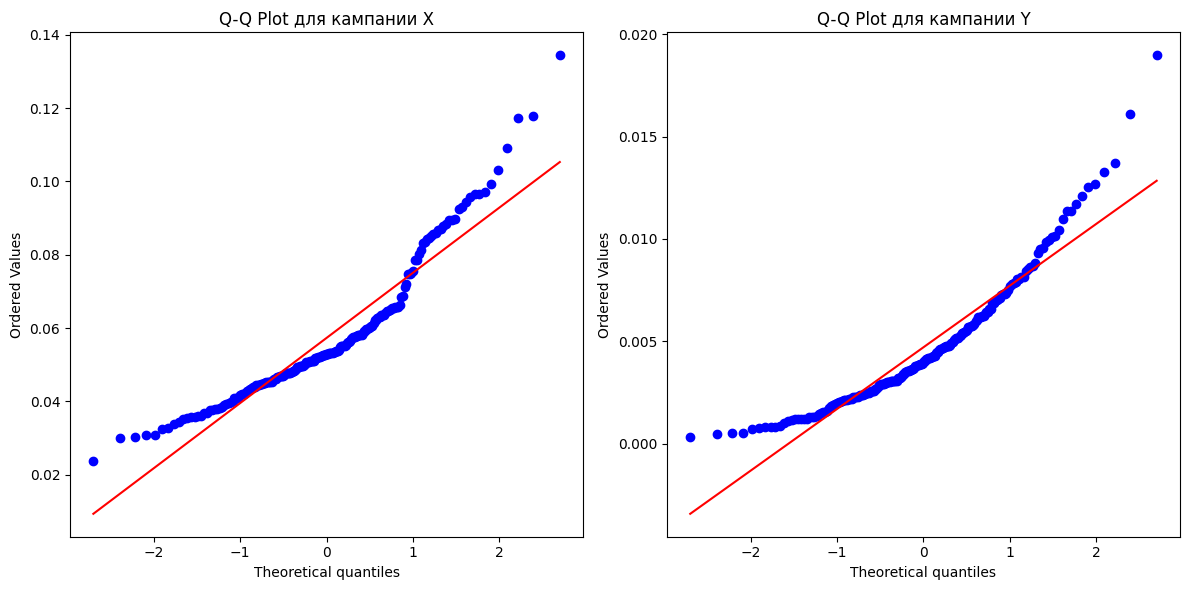

Результаты тестов нормальности:
Campaign X: Shapiro p-value = 0.00000000036262
Campaign Y: Shapiro p-value = 0.00000000042644


In [ ]:
plt.figure(figsize=(12, 6))

# Q-Q plot для кампании X
plt.subplot(121)
stats.probplot(campaign_x, dist="norm", plot=plt)
plt.title('Q-Q Plot для кампании X')

# Q-Q plot для кампании Y
plt.subplot(122)
stats.probplot(campaign_y, dist="norm", plot=plt)
plt.title('Q-Q Plot для кампании Y')

plt.tight_layout()
plt.show()

# Тест Шапиро-Уилка для обеих кампаний
stat_x, p_value_x = stats.shapiro(campaign_x)
stat_y, p_value_y = stats.shapiro(campaign_y)
print('Результаты тестов нормальности:')
print(f"Campaign X: Shapiro p-value = {p_value_x:.14f}")
print(f"Campaign Y: Shapiro p-value = {p_value_y:.14f}")

### 2.1.3 Выявите кластеры в данных [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN)

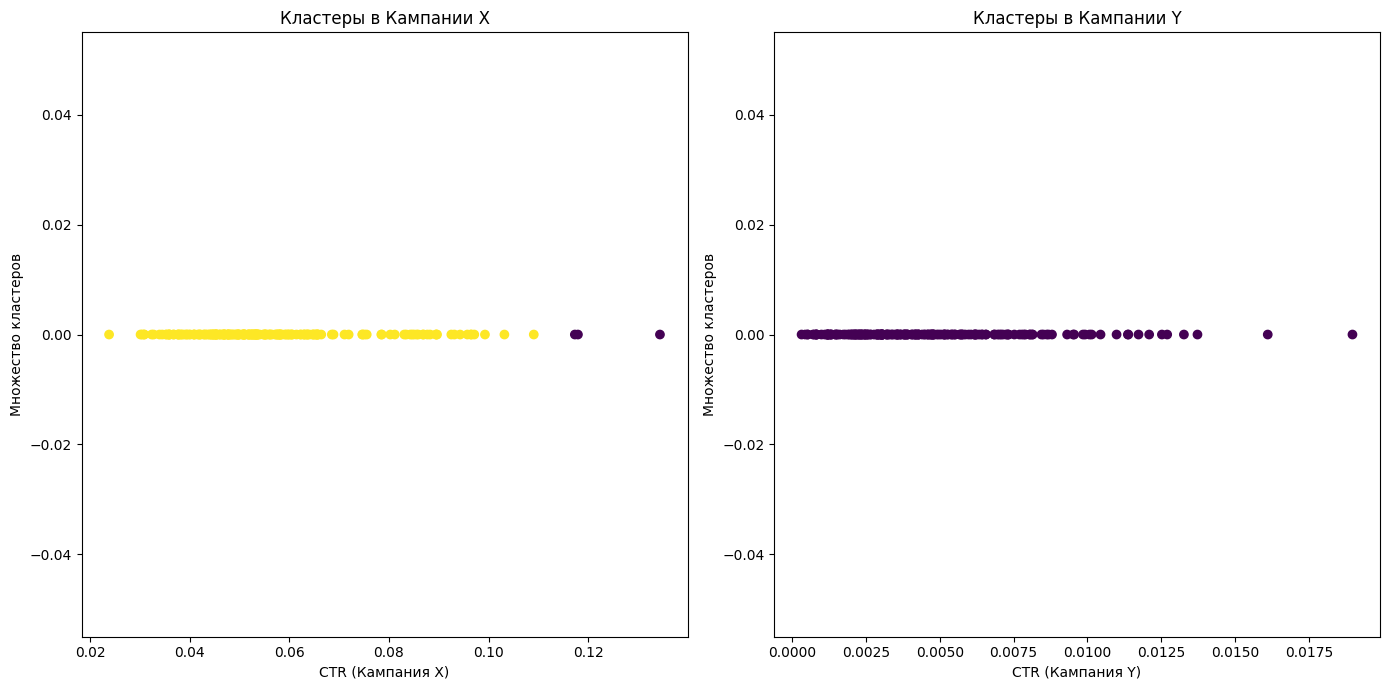

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
campaign_x_data = ctr_df[ctr_df['Campaign'] == 'X']['CTR'].values.reshape(-1, 1)
campaign_y_data = ctr_df[ctr_df['Campaign'] == 'Y']['CTR'].values.reshape(-1, 1)
campaign_x_scaled = scaler.fit_transform(campaign_x_data)
campaign_y_scaled = scaler.transform(campaign_y_data)

# Применение DBSCAN для кампании X
dbscan_x = DBSCAN(eps=0.5, min_samples=5)
clusters_x = dbscan_x.fit_predict(campaign_x_scaled)

# Применение DBSCAN для кампании Y
dbscan_y = DBSCAN(eps=0.5, min_samples=5)
clusters_y = dbscan_y.fit_predict(campaign_y_scaled)

# Визуализация результатов для обеих кампаний
plt.figure(figsize=(14, 7))

# Кампания X
plt.subplot(1, 2, 1)
plt.scatter(campaign_x_data, np.zeros_like(campaign_x_data), c=clusters_x, cmap='viridis', marker='o')
plt.title('Кластеры в Кампании X')
plt.xlabel('CTR (Кампания X)')
plt.ylabel('Множество кластеров')

# Кампания Y
plt.subplot(1, 2, 2)
plt.scatter(campaign_y_data, np.zeros_like(campaign_y_data), c=clusters_y, cmap='viridis', marker='o')
plt.title('Кластеры в Кампании Y')
plt.xlabel('CTR (Кампания Y)')
plt.ylabel('Множество кластеров')

plt.tight_layout()
plt.show()


In [ ]:
num_clusters_x = len(set(clusters_x))-1
num_clusters_y = len(set(clusters_y))-1
print('Обнаружено кластеров в Campaign X:',num_clusters_x)
print('Обнаружено кластеров в Campaign Y:',num_clusters_y)

Обнаружено кластеров в Campaign X: 1
Обнаружено кластеров в Campaign Y: 0


### 2.2 Статистический анализ вариативности

### 2.2.1 F-тест для нормализованных данных

In [ ]:
var_x = np.var(campaign_x_scaled, ddof=1)
var_y = np.var(campaign_y_scaled, ddof=1)
f_statistic = var_x / var_y
dfn = len(campaign_x_scaled) - 1  # Степени свободы для первой выборки
dfd = len(campaign_y_scaled) - 1  # Степени свободы для второй выборки
p_value_f_test = 1 - stats.f.cdf(f_statistic, dfn, dfd)  # p-value для F-теста

print(f"F-тест: F = {f_statistic:.2f}, p-value = {p_value_f_test:.20f}")

F-тест: F = 34.81, p-value = 0.00000000000000011102


### 2.2.2 Тест Левена с медианной центровкой

In [ ]:
w_statistic, p_value_levene = stats.levene(campaign_x, campaign_y, center='median')

print(f"Тест Левена: W = {w_statistic:.2f}, p-value = {p_value_levene:.30f}")

Тест Левена: W = 123.18, p-value = 0.000000000000000000000000405532


### 2.2.3 Bootstrap-оценка 95% ДИ для отношения дисперсий

In [ ]:
scaler = StandardScaler()
ctr_df['CTR_Scaled'] = scaler.fit_transform(ctr_df[['CTR']])

# Разделение на кампании после нормализации
campaign_x_scaled = ctr_df[ctr_df['Campaign'] == 'X']['CTR_Scaled'].values
campaign_y_scaled = ctr_df[ctr_df['Campaign'] == 'Y']['CTR_Scaled'].values

# Функция для бутстрап-оценки доверительного интервала
def bootstrap_ratio_of_variances(x, y, n_iterations=10000):
    ratios = []
    for _ in range(n_iterations):
        sample_x = np.random.choice(x, size=len(x), replace=True)
        sample_y = np.random.choice(y, size=len(y), replace=True)

        var_x = np.var(sample_x, ddof=1)
        var_y = np.var(sample_y, ddof=1)

        ratio = var_y / var_x  # Y / X
        ratios.append(ratio)

    ci_lower = np.percentile(ratios, 2.5)
    ci_upper = np.percentile(ratios, 97.5)
    return ci_lower, ci_upper

# Оценка доверительного интервала
ci_lower, ci_upper = bootstrap_ratio_of_variances(campaign_x_scaled, campaign_y_scaled)

print(f"95% ДИ отношения дисперсий (Y/X): [{ci_lower:.2f}, {ci_upper:.2f}]")


95% ДИ отношения дисперсий (Y/X): [0.02, 0.04]


### 2.3 Интерпретация

(а) Статистическая значимость вариативности (на основе коэффициента вариации и результатов тестов):

* Для обеих кампаний (X и Y) мы вычислили коэффициент вариации (CV). Он показывает степень вариативности CTR относительно среднего значения. Чем выше коэффициент, тем выше степень вариативности в данных.

* Кампания X имеет более высокий коэффициент вариации, что указывает на большую изменчивость CTR в этой кампании.

* Кампания Y имеет меньший коэффициент вариации, что говорит о более стабильном CTR.

Bootstrap-оценка отношения дисперсий:

* Мы оценили 95% доверительный интервал (ДИ) для отношения дисперсий CTR между кампаниями Y и X. ДИ: [0.02, 0.04]. Это означает, что дисперсия CTR в кампании Y меньше, чем в кампании X, и данное различие статистически значимо.

Результаты F-теста и теста Левена:

* F-тест показал, что дисперсии CTR между кампаниями значимо различаются, и кампания Y демонстрирует меньшую вариативность.

* Тест Левена также подтвердил, что различия в дисперсиях статистически значимы, даже при медианной центровке.

Кластеры в данных (метод DBSCAN):

* В данных кампании Y выделяется меньше кластеров, что подтверждает меньшую вариативность CTR и более стабильные показатели по сравнению с кампанией X

(б) Риск бюджетных потерь при нестабильности CTR:

* Кампания X имеет большую вариативность CTR, что может привести к нестабильности рекламных затрат и возврата инвестиций. Высокая изменчивость означает, что в некоторые периоды реклама может приносить значительно меньше, чем в другие. Это увеличивает риск потерь бюджета.

* Кампания Y, с другой стороны, более стабильна и с меньшей вариативностью. Это снижает риски нестабильности в рекламных расходах

(в) Оптимальный размер выборки для будущих тестов:


In [ ]:
S_X = np.std(campaign_x, ddof=1)
S_Y = np.std(campaign_y, ddof=1)

# Значения квантилей нормального распределения
Z_alpha_2 = stats.norm.ppf(0.975)  # 1.96 для 95% доверительного уровня
Z_beta = stats.norm.ppf(0.8)  # 0.84 для 80% мощности

# Расчет минимального размера выборки
n = ((Z_alpha_2 + Z_beta) / (S_Y / S_X)) ** 2
int(n)

273